In [1]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import ScalarFormatter
import numpy as np

In [2]:
def compute_mean_std_table(data: pd.DataFrame, column: str) -> pd.DataFrame:
    return round(
        data.groupby(column)
        .agg(
            {
                "Min Fidelity": ["mean", "std"],
            }
        )
        .rename_axis(column),
        4,
    )


def compute_f_statistic_p_value(
    data: pd.DataFrame, column: str
) -> pd.DataFrame:
    grouped_data = data.groupby(column)

    group_values = [group["Min Fidelity"].values for _, group in grouped_data]

    f_statistic, p_value = f_oneway(*group_values)

    return round(f_statistic, 4), round(p_value, 4)

In [3]:
excel_file_name = './new_hyperparameter_tuning_results_ga.csv'

In [4]:
data = pd.read_csv(excel_file_name)
data = data.round(4)

In [5]:
data.sort_values(by="Min Fidelity", inplace=True, ascending=False)
data.head(3)

,Sequence Length,Noise Amount,Crossover Rate,Elitism Rate,Min Fidelity,I,X,Y,Z,H,R_X_PI/4
142,32,0.15,0.8,0.12,0.9995,0.9995,0.9995,0.9996,0.9995,0.9995,0.9995
141,32,0.15,0.8,0.06,0.9994,0.9994,0.9994,0.9996,0.9995,0.9994,0.9996
139,32,0.15,0.4,0.12,0.9994,0.9995,0.9995,0.9996,0.9996,0.9994,0.9995


In [6]:
mean_min_fidelity = round(data["Min Fidelity"].mean(), 4)
std_min_fidelity = round(data["Min Fidelity"].std(), 4)
print(f"Mean min fidelity: {mean_min_fidelity} +- {std_min_fidelity}")

Mean min fidelity: 0.4161 +- 0.3913


In [7]:
hyperparameters = [
    "Sequence Length",
    "Noise Amount",
    "Crossover Rate",
    'Elitism Rate',
]


for hp in hyperparameters:
    display(compute_mean_std_table(data, hp))
    f_statistic, p_value = compute_f_statistic_p_value(data, hp)
    print(f"F-statistic: {f_statistic}, P-value: {p_value}")

Min Fidelity        
                        mean     std
Sequence Length                     
1                     0.0001  0.0000
2                     0.0006  0.0001
4                     0.0060  0.0036
8                     0.0733  0.0376
16                    0.6753  0.0338
32                    0.9974  0.0026
64                    0.9854  0.0027
128                   0.7893  0.0109
256                   0.3547  0.0243
512                   0.2794  0.0080

F-statistic: 13595.2797, P-value: 0.0


Min Fidelity        
                     mean     std
Noise Amount                     
0.15               0.4194  0.3924
0.30               0.4197  0.3914
0.60               0.4094  0.3944

F-statistic: 0.0201, P-value: 0.9801


Min Fidelity        
                       mean     std
Crossover Rate                     
0.2                  0.4169  0.3922
0.4                  0.4154  0.3920
0.8                  0.4161  0.3941

F-statistic: 0.0004, P-value: 0.9996


Min Fidelity        
                     mean     std
Elitism Rate                     
0.06               0.4157  0.3927
0.12               0.4171  0.3932
0.24               0.4157  0.3924

F-statistic: 0.0004, P-value: 0.9996


In [8]:
for sequence_length in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]:
    reduced_data = data[data["Sequence Length"] == sequence_length]
    highest_min_fidelity = reduced_data["Min Fidelity"].max()
    print(
        f"Sequence Length: {sequence_length}, Highest Min Fidelity: {highest_min_fidelity}"
    )

Sequence Length: 1, Highest Min Fidelity: 0.0001
Sequence Length: 2, Highest Min Fidelity: 0.001
Sequence Length: 4, Highest Min Fidelity: 0.0119
Sequence Length: 8, Highest Min Fidelity: 0.1206
Sequence Length: 16, Highest Min Fidelity: 0.728
Sequence Length: 32, Highest Min Fidelity: 0.9995
Sequence Length: 64, Highest Min Fidelity: 0.9881
Sequence Length: 128, Highest Min Fidelity: 0.8054
Sequence Length: 256, Highest Min Fidelity: 0.3753
Sequence Length: 512, Highest Min Fidelity: 0.2971


In [9]:
use_pdf = False
use_png = not use_pdf
if use_pdf:
    mpl.use("pdf")
file_extension = "pdf" if use_pdf else "png"

In [10]:
report_path= "/home/chriswise/github/Honours-Research-ML-for-QC/Report/sections/grad_free_results/figures/"
windows_path = "/mnt/c/Users/ChrisWiseLocal/OneDrive/Documents/Uni/UNSW/2023/Honours Research/Seminars/report_photos/"

In [11]:
path_to_save = report_path if use_pdf else windows_path

In [12]:
width = 3.487
height = width / 1.618
alpha_value = 0.75
title_font_size = 9
plt.rc("font", family="serif", serif="cm10")
plt.rc("text", usetex=True)
plt.rc("axes", labelsize=title_font_size - 2)

In [13]:
mean_min_fidelity = data.groupby("Sequence Length")["Min Fidelity"].mean()

In [14]:
print(sorted(data["Sequence Length"].unique()))

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512]


In [15]:
default_blue = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]

In [26]:
excel_file_name = './qubit_control_minimum_fidelity_results.xlsx'

qubit_control_data = pd.read_excel(excel_file_name)

In [27]:
display(qubit_control_data['Diff. Evo.'])

KeyError: 'Diff. Evo.'

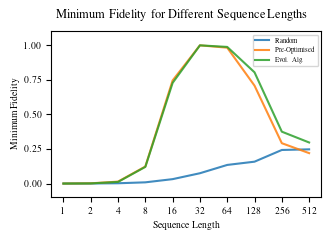

In [28]:
width = 3.487
height = width / 1.618
alpha_value = 0.85
title_font_size = 9

fig, ax = plt.subplots(figsize=(width, height))

plt.rc("font", family="serif", serif="Times")
plt.rc("text", usetex=True)
plt.rc("axes", labelsize=title_font_size - 2)

plt.suptitle(
    "Minimum Fidelity for Different Sequence Lengths",
    fontsize=title_font_size,
)

control_pulse_types = ["Random", 'Pre-Optimised', 'Evol. Alg.']
sequence_lengths = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

for index, pulse_type in enumerate(control_pulse_types):
    filtered_data = qubit_control_data[pulse_type ]

    colour = plt.rcParams["axes.prop_cycle"].by_key()["color"][index]

    ax.plot(
        sequence_lengths,
        filtered_data,
        color=colour,
        alpha=alpha_value,
        label=f"{pulse_type}",
    )

ax.set_xscale("log", base=2)
ax.legend(fontsize=title_font_size - 4)

plt.xticks(sequence_lengths, fontsize=title_font_size - 2)
plt.yticks(fontsize=title_font_size - 2)

plt.xlabel("Sequence Length", fontsize=title_font_size - 2)
plt.ylabel(
    "Minimum Fidelity", fontsize=title_font_size - 2
)
plt.ylim(-0.1, 1.1)

formatter = ScalarFormatter()
formatter.set_scientific(False)
ax.xaxis.set_major_formatter(formatter)


# fig.tight_layout()
plt.savefig(
    path_to_save + f"qubit_control_min_fidelity.{file_extension}",
    dpi=500,
    bbox_inches="tight",
)